### Import packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# check data directory
# ls

### import data into pandas dataframe

In [3]:
medical_df = pd.read_csv("project_dataset - project_dataset.csv")
medical_df.head(10)

EmployeeID  Age     BusinessTravel  MonthlyIncome  JobSatisfaction  Bonus  \
0           1   41      Travel_Rarely           5993                4  17979   
1           2   49  Travel_Frequently           5130                2  20520   
2           4   37      Travel_Rarely           2090                3   6270   
3           5   33  Travel_Frequently           2909                3   8727   
4           7   27      Travel_Rarely           3468                2  10404   
5           8   32  Travel_Frequently           3068                4   9204   
6          10   59      Travel_Rarely           2670                1  10680   
7          11   30      Travel_Rarely           2693                3  10772   
8          12   38  Travel_Frequently           9526                3  38104   
9          13   36      Travel_Rarely           5237                3  15711   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   
5  Research & Development                 2          2  Life Sciences   
6  Research & Development                 3          3        Medical   
7  Research & Development                24          1  Life Sciences   
8  Research & Development                23          3  Life Sciences   
9  Research & Development                27          3        Medical   

   EnvSatisfaction  Gender                    JobRole MaritalStatus  \
0                2  Female            Sales Executive        Single   
1                3    Male         Research Scientist       Married   
2                4    Male      Laboratory Technician        Single   
3                4  Female         Research Scientist       Married   
4                1    Male      Laboratory Technician       Married   
5                4    Male      Laboratory Technician        Single   
6                3  Female      Laboratory Technician       Married   
7                4    Male      Laboratory Technician      Divorced   
8                4    Male     Manufacturing Director        Single   
9                3    Male  Healthcare Representative       Married   

   PerformanceRating  TrainingTimesLastYear  YearsAtCompany  \
0                  3                      0               6   
1                  4                      3              10   
2                  3                      3               0   
3                  3                      3               8   
4                  3                      3               2   
5                  3                      2               7   
6                  4                      3               1   
7                  4                      2               1   
8                  4                      2               9   
9                  3                      3               7   

   YearsSinceLastPromotion OverTime Attrition  
0                        0      Yes       Yes  
1                        1       No        No  
2                        0      Yes       Yes  
3                        3      Yes        No  
4                        2       No        No  
5                        3       No        No  
6                        0      Yes        No  
7                        0       No        No  
8                        1       No        No  
9                        7       No        No

In [4]:
# make the EmployeeID as the index column
medical_df = medical_df.set_index('EmployeeID')
medical_df

Age     BusinessTravel  MonthlyIncome  JobSatisfaction  Bonus  \
EmployeeID                                                                  
1            41      Travel_Rarely           5993                4  17979   
2            49  Travel_Frequently           5130                2  20520   
4            37      Travel_Rarely           2090                3   6270   
5            33  Travel_Frequently           2909                3   8727   
7            27      Travel_Rarely           3468                2  10404   
...         ...                ...            ...              ...    ...   
2061         36  Travel_Frequently           2571                4   7713   
2062         39      Travel_Rarely           9991                1  29973   
2064         27      Travel_Rarely           6142                2  24568   
2065         49  Travel_Frequently           5390                2  16170   
2068         34      Travel_Rarely           4404                3  13212   

                        Department  DistanceFromHome  Education  \
EmployeeID                                                        
1                            Sales                 1          2   
2           Research & Development                 8          1   
4           Research & Development                 2          2   
5           Research & Development                 3          4   
7           Research & Development                 2          1   
...                            ...               ...        ...   
2061        Research & Development                23          2   
2062        Research & Development                 6          1   
2064        Research & Development                 4          3   
2065                         Sales                 2          3   
2068        Research & Development                 8          3   

           EducationField  EnvSatisfaction  Gender                    JobRole  \
EmployeeID                                                                      
1           Life Sciences                2  Female            Sales Executive   
2           Life Sciences                3    Male         Research Scientist   
4                   Other                4    Male      Laboratory Technician   
5           Life Sciences                4  Female         Research Scientist   
7                 Medical                1    Male      Laboratory Technician   
...                   ...              ...     ...                        ...   
2061              Medical                3    Male      Laboratory Technician   
2062              Medical                4    Male  Healthcare Representative   
2064        Life Sciences                2    Male     Manufacturing Director   
2065              Medical                4    Male            Sales Executive   
2068              Medical                2    Male      Laboratory Technician   

           MaritalStatus  PerformanceRating  TrainingTimesLastYear  \
EmployeeID                                                           
1                 Single                  3                      0   
2                Married                  4                      3   
4                 Single                  3                      3   
5                Married                  3                      3   
7                Married                  3                      3   
...                  ...                ...                    ...   
2061             Married                  3                      3   
2062             Married                  3                      5   
2064             Married                  4                      0   
2065             Married                  3                      3   
2068             Married                  3                      3   

            YearsAtCompany  YearsSinceLastPromotion OverTime Attrition  
EmployeeID                                                              
1                        6 

### Data Preparation

#### Perform Exploration Data Analysis
- check the data shape
- Check for Null Data
- Check for Duplicates
- Check the data summary statistics
- Check for correlations
- Check for multicolinearity
- Rearranging the columns

In [5]:
# check the data shape
medical_df.shape

(1470, 19)

In [6]:
# check for null data
medical_df.isnull().sum()

Age                        0
BusinessTravel             0
MonthlyIncome              0
JobSatisfaction            0
Bonus                      0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvSatisfaction            0
Gender                     0
JobRole                    0
MaritalStatus              0
PerformanceRating          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
OverTime                   0
Attrition                  0
dtype: int64

In [7]:
#check for duplicates
medical_df[medical_df.duplicated(keep=False)]

Empty DataFrame
Columns: [Age, BusinessTravel, MonthlyIncome, JobSatisfaction, Bonus, Department, DistanceFromHome, Education, EducationField, EnvSatisfaction, Gender, JobRole, MaritalStatus, PerformanceRating, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, OverTime, Attrition]
Index: []

In [8]:
#check the data summary statistics
medical_df.describe(include='all')

Age BusinessTravel  MonthlyIncome  JobSatisfaction  \
count   1470.000000           1470    1470.000000      1470.000000   
unique          NaN              3            NaN              NaN   
top             NaN  Travel_Rarely            NaN              NaN   
freq            NaN           1043            NaN              NaN   
mean      36.923810            NaN    6502.931293         2.728571   
std        9.135373            NaN    4707.956783         1.102846   
min       18.000000            NaN    1009.000000         1.000000   
25%       30.000000            NaN    2911.000000         2.000000   
50%       36.000000            NaN    4919.000000         3.000000   
75%       43.000000            NaN    8379.000000         4.000000   
max       60.000000            NaN   19999.000000         4.000000   

               Bonus              Department  DistanceFromHome    Education  \
count    1470.000000                    1470       1470.000000  1470.000000   
unique           NaN                       3               NaN          NaN   
top              NaN  Research & Development               NaN          NaN   
freq             NaN                     961               NaN          NaN   
mean    20479.501361                     NaN          9.192517     2.912925   
std     15066.272964                     NaN          8.106864     1.024165   
min      3027.000000                     NaN          1.000000     1.000000   
25%      9333.750000                     NaN          2.000000     2.000000   
50%     15484.500000                     NaN          7.000000     3.000000   
75%     26103.750000                     NaN         14.000000     4.000000   
max     79892.000000                     NaN         29.000000     5.000000   

       EducationField  EnvSatisfaction Gender          JobRole MaritalStatus  \
count            1470      1470.000000   1470             1470          1470   
unique              6              NaN      2                9             3   
top     Life Sciences              NaN   Male  Sales Executive       Married   
freq              606              NaN    882              326           673   
mean              NaN         2.721769    NaN              NaN           NaN   
std               NaN         1.093082    NaN              NaN           NaN   
min               NaN         1.000000    NaN              NaN           NaN   
25%               NaN         2.000000    NaN              NaN           NaN   
50%               NaN         3.000000    NaN              NaN           NaN   
75%               NaN         4.000000    NaN              NaN           NaN   
max               NaN         4.000000    NaN              NaN           NaN   

        PerformanceRating  TrainingTimesLastYear  YearsAtCompany  \
count         1470.000000            1470.000000     1470.000000   
unique                NaN                    NaN             NaN   
top                   NaN                    NaN             NaN   
freq                  NaN                    NaN             NaN   
mean             3.153741               2.799320        7.008163   
std              0.360824               1.289271        6.126525   
min              3.000000               0.000000        0.000000   
25%              3.000000               2.000000        3.000000   
50%              3.000000               3.000000        5.000000   
75%              3.000000               3.000000        9.000000   
max              4.000000               6.000000       40.000000   

        YearsSinceLastPromotion OverTime Attrition  
count               1470.000000     1470      1470  
unique                      NaN        2         2  
top                         NaN       No        No  
freq                        NaN     1054      1233  
mean                   2.187755      NaN       NaN  
std                    3.222430      NaN       NaN  
min                    0.000000      NaN       NaN  
25%                    0

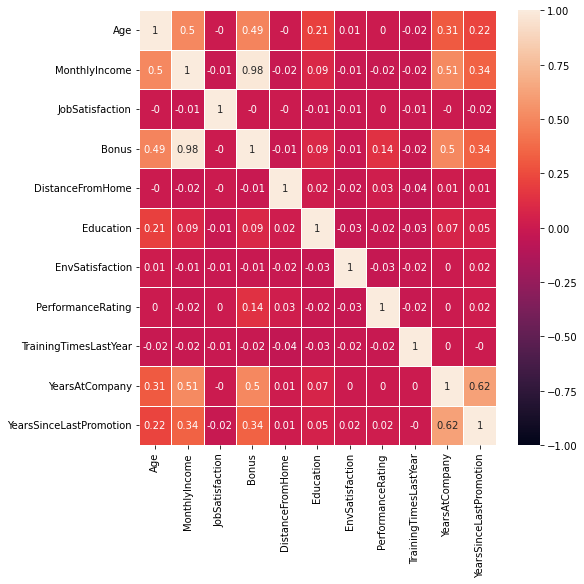

In [9]:
#use heatmap function to understand the data summary better
# use seaborn to visualize the correlation with heatmap
plt.figure(figsize=(8,8))
sns.heatmap(medical_df.corr().round(2),vmin=-1, vmax=1, annot=True,linewidth=.5);

In [10]:
medical_df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [11]:
# check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
copy_medical = medical_df.copy()
copy_medical['Attrition'] = copy_medical['Attrition'].map({'Yes':1,'No':0})
copy_medical['OverTime'] = copy_medical['OverTime'].map({'Yes':1,'No':0})
copy_medical['MaritalStatus'] = copy_medical['MaritalStatus'].map({'Married':1,'Divorced':2,'Single':3})
copy_medical['BusinessTravel'] = copy_medical['BusinessTravel'].map({'Travel_Rarely':1,'Travel_Frequently':2,'Non-Travel':3})
copy_medical['Gender'] = copy_medical['Gender'].map({'Female':1,'Male':0})

# select certain input variables
copy_medical = copy_medical[['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'DistanceFromHome',
       'EnvSatisfaction', 'Gender', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition']]

copy_medical

Age  BusinessTravel  MonthlyIncome  JobSatisfaction  Bonus  \
EmployeeID                                                               
1            41               1           5993                4  17979   
2            49               2           5130                2  20520   
4            37               1           2090                3   6270   
5            33               2           2909                3   8727   
7            27               1           3468                2  10404   
...         ...             ...            ...              ...    ...   
2061         36               2           2571                4   7713   
2062         39               1           9991                1  29973   
2064         27               1           6142                2  24568   
2065         49               2           5390                2  16170   
2068         34               1           4404                3  13212   

            DistanceFromHome  EnvSatisfaction  Gender  MaritalStatus  \
EmployeeID                                                             
1                          1                2       1              3   
2                          8                3       0              1   
4                          2                4       0              3   
5                          3                4       1              1   
7                          2                1       0              1   
...                      ...              ...     ...            ...   
2061                      23                3       0              1   
2062                       6                4       0              1   
2064                       4                2       0              1   
2065                       2                4       0              1   
2068                       8                2       0              1   

            PerformanceRating  TrainingTimesLastYear  YearsAtCompany  \
EmployeeID                                                             
1                           3                      0               6   
2                           4                      3              10   
4                           3                      3               0   
5                           3                      3               8   
7                           3                      3               2   
...                       ...                    ...             ...   
2061                        3                      3               5   
2062                        3                      5               7   
2064                        4                      0               6   
2065                        3                      3               9   
2068                        3                      3               4   

            YearsSinceLastPromotion  OverTime  Attrition  
EmployeeID                                                
1                                 0         1          1  
2                                 1         0          0  
4                                 0         1          1  
5                                 3         1          0  
7                                 2         0          0  
...                             ...       ...        ...  
2061                              0         0          0  
2062                              1         0          0  
2064                              0         1          0  
2065                              0         0          0  
2068                              1         0          0  

[1470 rows x 15 columns]

In [12]:
# VIF Dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = copy_medical.columns
vif_data

feature
0                       Age
1            BusinessTravel
2             MonthlyIncome
3           JobSatisfaction
4                     Bonus
5          DistanceFromHome
6           EnvSatisfaction
7                    Gender
8             MaritalStatus
9         PerformanceRating
10    TrainingTimesLastYear
11           YearsAtCompany
12  YearsSinceLastPromotion
13                 OverTime
14                Attrition

In [13]:
#calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(copy_medical.values,i) for i in range(len(copy_medical.columns))]
print(vif_data)

                    feature         VIF
0                       Age   22.295740
1            BusinessTravel    5.312998
2             MonthlyIncome  111.293878
3           JobSatisfaction    7.053365
4                     Bonus  106.448691
5          DistanceFromHome    2.302447
6           EnvSatisfaction    7.161742
7                    Gender    1.678806
8             MaritalStatus    5.674453
9         PerformanceRating   40.294776
10    TrainingTimesLastYear    5.669428
11           YearsAtCompany    4.540620
12  YearsSinceLastPromotion    2.392605
13                 OverTime    1.526281
14                Attrition    1.409794


In [14]:
# copy_medical.columns

In [15]:
# copy_medical = copy_medical[['Age','DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction','EnvSatisfaction','YearsAtCompany','Gender','OverTime','Attrition']]

In [16]:
# copy_medical = pd.get_dummies(copy_medical)
# copy_medical

In [17]:
# plt.figure(figsize=(8,8))
# sns.heatmap(copy_medical.corr().round(2),vmin=-1, vmax=1, annot=True);

# Check for variables that affect the attrition rate

## Univariate Analysis

In [18]:
# use value count function to find the number of counts of
# attributes within the class
# and use normalize to find the proportion of it
attrition = medical_df['Attrition'].value_counts(normalize=True)*100
attrition

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

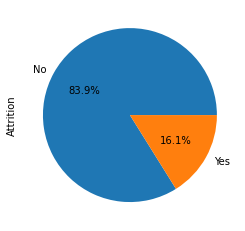

In [19]:
attrition.plot(kind='pie',autopct='%.1f%%')
plt.show()

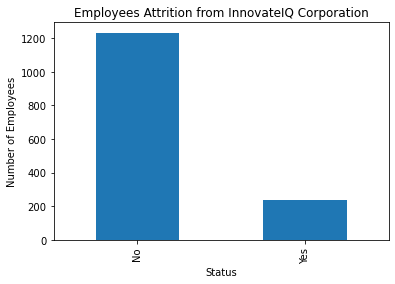

In [20]:
# use graphical to understand the data better
medical_raw_count = medical_df['Attrition'].value_counts()
medical_raw_count.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Number of Employees')
plt.title('Employees Attrition from InnovateIQ Corporation')
plt.show()

### <i>Finding For Attrition:</i>
#### <i> The data for attrition column shows about 84% of their client are still working in the company.while about 16% has  attrited from the medical company.However the class proportion is unbalanced.</i>

In [21]:
gender = medical_df['Gender'].value_counts(normalize=True)*100
gender

Male      60.0
Female    40.0
Name: Gender, dtype: float64

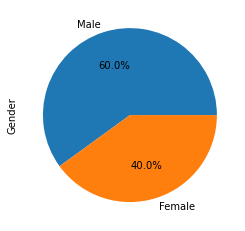

In [22]:
gender.plot(kind='pie',autopct='%.1f%%')
plt.show()

### <i>Finding For Gender:</i>
#### <i> The data for gender column shows that 60% of their employees are male and 40% are female regardless their attrition status</i>

In [23]:
years_at_com = medical_df['YearsAtCompany'].describe()
years_at_com

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

Skewness: 1.765
Kurtosis: 3.936


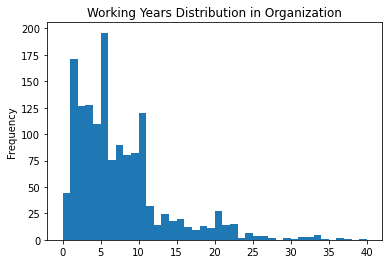

In [24]:
medical_df['YearsAtCompany'].plot(kind='hist',bins=40)
plt.title('Working Years Distribution in Organization')
# check for the skewness and kurtosis
print("Skewness: {:0.3f}".format(medical_df['YearsAtCompany'].skew()))
print("Kurtosis: {:0.3f}".format(medical_df['YearsAtCompany'].kurt()))

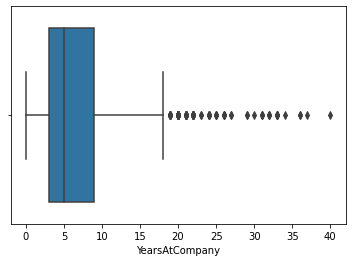

In [25]:
sns.boxplot(x='YearsAtCompany',data=medical_df)
plt.show()

In [26]:
medical_df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

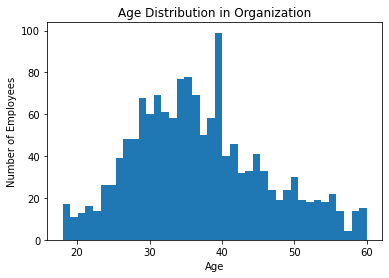

In [27]:
medical_df['Age'].plot(kind='hist',bins=40)
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.title('Age Distribution in Organization')
plt.show()

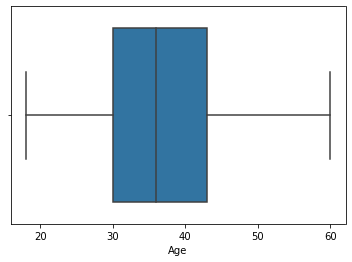

In [28]:
sns.boxplot(x='Age',data=medical_df)
plt.show()

<AxesSubplot:ylabel='Frequency'>

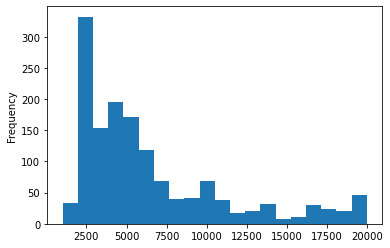

In [29]:
medical_df['MonthlyIncome'].plot(kind='hist',bins=20)

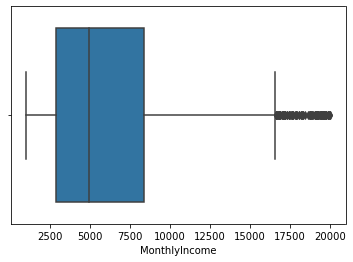

In [30]:
sns.boxplot(x='MonthlyIncome',data=medical_df)
plt.show()

<AxesSubplot:ylabel='Frequency'>

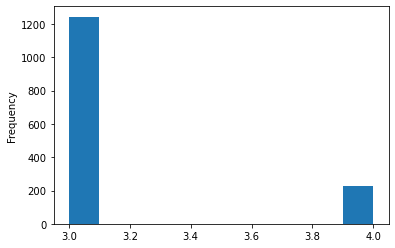

In [31]:
medical_df['PerformanceRating'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

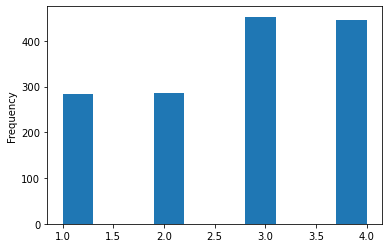

In [32]:
envi = medical_df['EnvSatisfaction'].plot(kind='hist')
envi

In [33]:
envi_prop = medical_df['EnvSatisfaction'].value_counts(normalize=True)*100
envi_prop

3    30.816327
4    30.340136
2    19.523810
1    19.319728
Name: EnvSatisfaction, dtype: float64

<AxesSubplot:ylabel='EnvSatisfaction'>

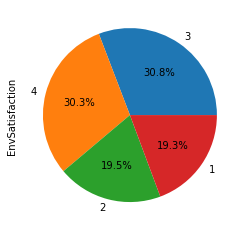

In [34]:
envi_prop.plot(kind='pie',autopct='%.1f%%')

<AxesSubplot:ylabel='Frequency'>

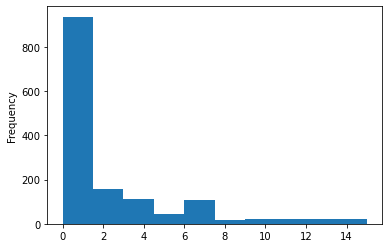

In [35]:
promote = medical_df['YearsSinceLastPromotion'].plot(kind='hist')
promote

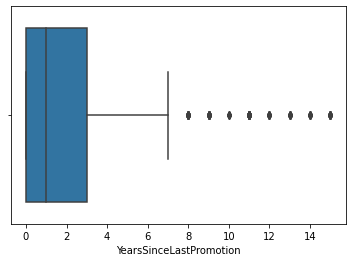

In [36]:
sns.boxplot(x='YearsSinceLastPromotion',data=medical_df)
plt.show()

In [37]:
over_prop = medical_df['OverTime'].value_counts(normalize=True)*100
over_prop

No     71.70068
Yes    28.29932
Name: OverTime, dtype: float64

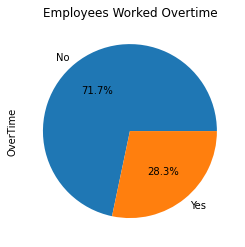

In [38]:
over_prop.plot(kind='pie',autopct='%.1f%%')
plt.title('Employees Worked Overtime')
plt.show()

## Multivariate Analysis

### Describe the Attrition based on Gender. Compute the attrition rate based on Gender

In [39]:
round(pd.crosstab(index=medical_df['Attrition'],columns=medical_df['Gender'],normalize='index'),2)

Gender     Female  Male
Attrition              
No           0.41  0.59
Yes          0.37  0.63

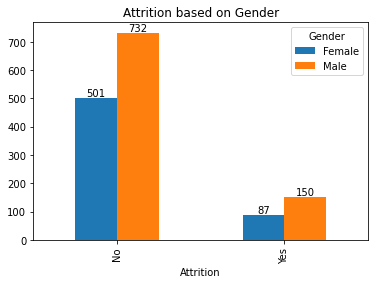

In [40]:
gender = pd.crosstab(index=medical_df['Attrition'],columns=medical_df['Gender'])
ax = gender.plot(kind = 'bar')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Attrition based on Gender')
plt.show()

In [41]:
# test with CHI SQUARE test to check if proportion different for female and male by Attrition status has differently significant
chi,p,dof,exp = stats.chi2_contingency(gender)
print('the chi square test is {}'.format(round(p,3)))
# p > 0.05
#The ratios in our data are the same. Gender isn't a strong determinant of an employee beeing attrited or not

the chi square test is 0.291


### Describe the Attrition based on YearsAtCompany. Compute the attrition rate based on YearsAtCompany


In [42]:
mean_years = round(medical_df.groupby('Attrition',as_index=False)['YearsAtCompany'].mean())
mean_years = mean_years.rename(columns={'YearsAtCompany': 'Mean Years working at the Company'})
mean_years

Attrition  Mean Years working at the Company
0        No                                7.0
1       Yes                                5.0

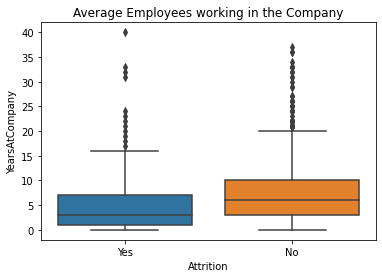

In [43]:
sns.boxplot(x ='Attrition', y ='YearsAtCompany', data = medical_df)
plt.title('Average Employees working in the Company')
plt.show()

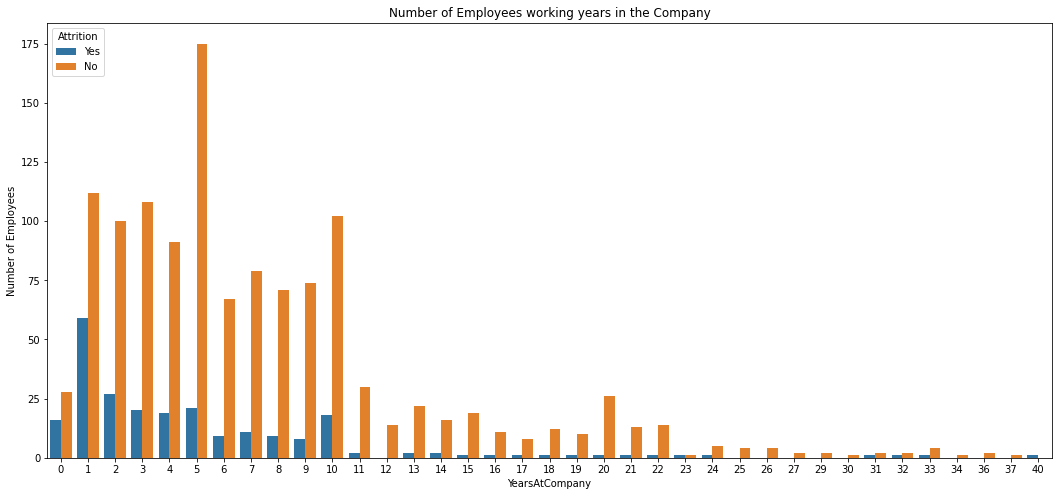

In [44]:
fig = plt.figure(figsize=(18,8))
sns.countplot(x='YearsAtCompany',hue = 'Attrition',data = medical_df)
plt.ylabel('Number of Employees')
plt.title('Number of Employees working years in the Company')
plt.show()

In [45]:
from scipy.stats import levene
from scipy.stats import ttest_ind

print(levene(medical_df['YearsAtCompany'][medical_df['Attrition'] == 'Yes'],
       medical_df['YearsAtCompany'][medical_df['Attrition'] == 'No'], center = 'mean'))   

print(ttest_ind(medical_df['YearsAtCompany'][medical_df['Attrition'] == 'Yes'],
       medical_df['YearsAtCompany'][medical_df['Attrition'] == 'No'])) 

# p < 0.05
# YearsAtCompany is significantly affect the attrition rate
# Employees in their early years of career tend to resign 
# a lot more than employees who've worked in the company for  more 7 years

LeveneResult(statistic=2.5049476586425445, pvalue=0.11370465713766563)
Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)


### Describe the Attrition based on Income. Compute the attrition rate based on Income

In [46]:
mean_income = round(medical_df.groupby('Attrition',as_index=False)['MonthlyIncome'].mean(),2)
mean_income = mean_income.rename(columns={'MonthlyIncome': 'Mean Monthly Income'})
mean_income

Attrition  Mean Monthly Income
0        No              6832.74
1       Yes              4787.09

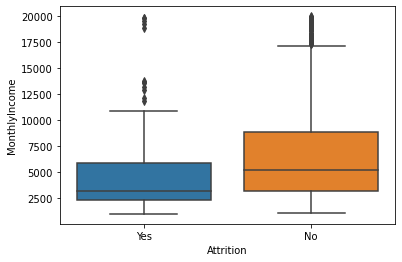

In [47]:
sns.boxplot(x ='Attrition', y ='MonthlyIncome', data = medical_df)
plt.show()

In [48]:
rate_att=medical_df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income counts of People in Organization')
fig.show()

In [49]:
print(levene(medical_df['MonthlyIncome'][medical_df['Attrition'] == 'Yes'],
       medical_df['MonthlyIncome'][medical_df['Attrition'] == 'No'], center = 'mean'))   

print(ttest_ind(medical_df['MonthlyIncome'][medical_df['Attrition'] == 'Yes'],
       medical_df['MonthlyIncome'][medical_df['Attrition'] == 'No'], equal_var = False))

    
# p < 0.05
# Monthly Income is significantly affect the attrition rate
# Higher salary is a usualy motivation to keep working in the same company

LeveneResult(statistic=26.31302358992364, pvalue=3.29070575711061e-07)
Ttest_indResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13)


### Describe the Attrition based on Environment. Compute the attrition rate based on Environment

In [50]:
round(pd.crosstab(index=medical_df['Attrition'],columns=medical_df['EnvSatisfaction'],normalize='index'),2)

EnvSatisfaction     1     2     3     4
Attrition                              
No               0.17  0.20  0.32  0.31
Yes              0.30  0.18  0.26  0.25

In [51]:
envi_raw = pd.crosstab(index=medical_df['Attrition'],columns=medical_df['EnvSatisfaction'])
envi_raw

EnvSatisfaction    1    2    3    4
Attrition                          
No               212  244  391  386
Yes               72   43   62   60

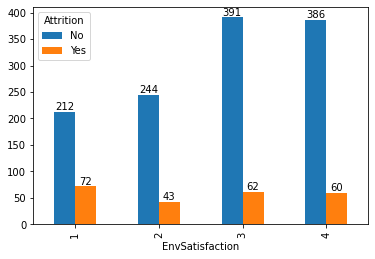

In [52]:
envi = pd.crosstab(index=medical_df['EnvSatisfaction'],columns=medical_df['Attrition'])
ax = envi.plot(kind = 'bar')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

In [53]:
chi,p,dof,exp = stats.chi2_contingency(envi)
print('the chi square test is {}'.format(p))
# 5.1234689062894205e-05 < 0.05
# the satisfaction level from level 1-4, the chances of people leaving the company is slightly decrease.
# There is a change the company to improve and do better to retain the employees

the chi square test is 5.1234689062894205e-05


### Describe the Attrition based on Job Satisfaction. Compute the attrition rate based on Job Satisfaction

In [54]:
round(pd.crosstab(index=medical_df['Attrition'],columns=medical_df['JobSatisfaction'],normalize='index'),2)

JobSatisfaction     1     2     3     4
Attrition                              
No               0.18  0.19  0.30  0.33
Yes              0.28  0.19  0.31  0.22

In [55]:
satisfaction_raw = round(pd.crosstab(index=medical_df['Attrition'],columns=medical_df['JobSatisfaction']),2)
satisfaction_raw

JobSatisfaction    1    2    3    4
Attrition                          
No               223  234  369  407
Yes               66   46   73   52

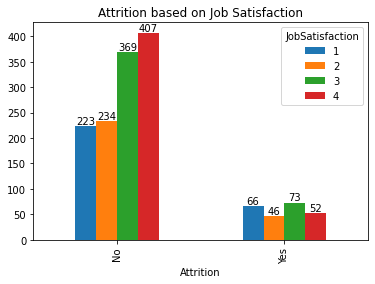

In [56]:
ax = satisfaction_raw.plot(kind = 'bar')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
ax.bar_label(ax.containers[2], label_type='edge')
ax.bar_label(ax.containers[3], label_type='edge')
plt.title('Attrition based on Job Satisfaction')
plt.show()

In [57]:
chi,p,dof,exp = stats.chi2_contingency(satisfaction_raw)
print('the chi square test is {}'.format(p))

# 0.0005563004510387556 < 0.05
# the job satisfaction level from level 1-4, affect the attrition rate

# the chances of people leaving the company is slightly decrease.
# There is a change the company to improve and do better to retain the employees

the chi square test is 0.0005563004510387556


### Describe the Attrition based on Age. Compute the attrition rate based on Age

In [58]:
mean_age = round(medical_df.groupby('Attrition',as_index=False)['Age'].mean(),1)
mean_age = mean_age.rename(columns={'Age': 'Mean Age'})
mean_age

Attrition  Mean Age
0        No      37.6
1       Yes      33.6

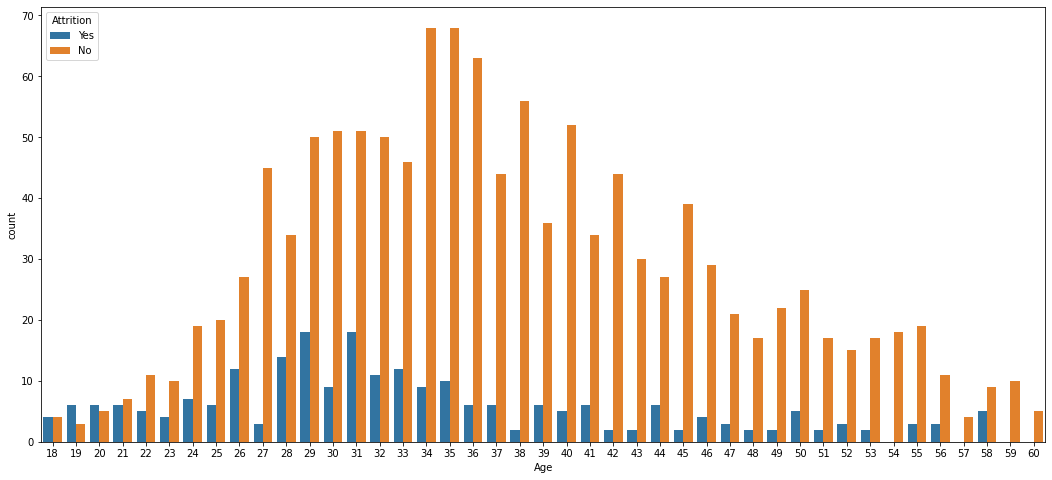

In [59]:
fig = plt.figure(figsize=(18,8))
sns.countplot(x='Age',hue = 'Attrition',data = medical_df)
plt.show()

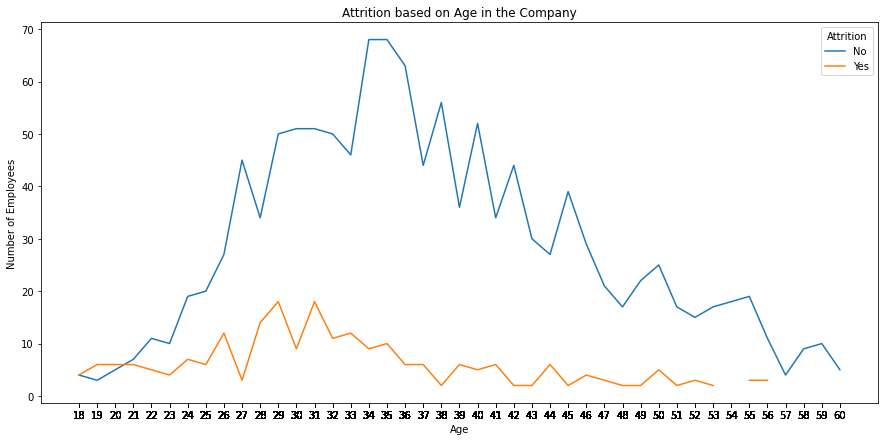

In [60]:
fig,ax = plt.subplots(figsize=(15,7))
medical_df.groupby(['Age','Attrition']).count()['Gender'].unstack().plot(ax=ax)
ax.set_title('Attrition based on Age in the Company')
# ax.grid()
plt.xticks(medical_df['Age'])
plt.ylabel('Number of Employees')
plt.show()
# the attrition is maximum between the age groups 28-32.
# The attrition rate keeps on falling with increasing age, 
# as people look after stability in their jobs at these point of times

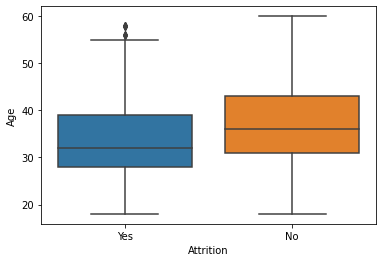

In [61]:
sns.boxplot(x ='Attrition', y ='Age', data = medical_df)
plt.show()

In [62]:
print(levene(medical_df['Age'][medical_df['Attrition'] == 'Yes'],
       medical_df['Age'][medical_df['Attrition'] == 'No'], center = 'mean'))   

print(ttest_ind(medical_df['Age'][medical_df['Attrition'] == 'Yes'],
       medical_df['Age'][medical_df['Attrition'] == 'No']))

# p < 0.05
# Age is significantly affect the attrition rate
# Older people is tend to keep working and stay in the same company

LeveneResult(statistic=1.1583170677572885, pvalue=0.2819916793250208)
Ttest_indResult(statistic=-6.1786638353072165, pvalue=8.356308021103649e-10)


### Describe the Attrition based on BusinessTravel. Compute the attrition rate based on BusinessTravel

In [63]:
round(pd.crosstab(index=medical_df['Attrition'],columns=medical_df['BusinessTravel'],normalize='index'),2)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                    0.11               0.17           0.72
Yes                   0.05               0.29           0.66

In [64]:
travel_raw = round(pd.crosstab(index=medical_df['Attrition'],columns=medical_df['BusinessTravel']),2)
travel_raw

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156

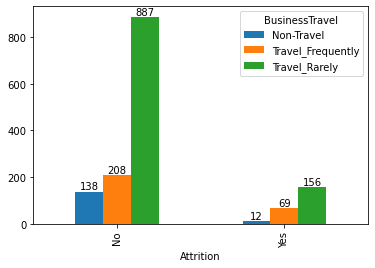

In [65]:
ax = travel_raw.plot(kind = 'bar')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
ax.bar_label(ax.containers[2], label_type='edge')
plt.show()

In [66]:
chi,p,dof,exp = stats.chi2_contingency(travel_raw)
print('the chi square test is {}'.format(p))
# p < 0.05
# BusinessTravel is significantly affect the attrition rate

the chi square test is 5.608614476449931e-06


### Describe the Attrition based on Overtime. Compute the attrition rate based on Overtime

In [67]:
round(pd.crosstab(index=medical_df['Attrition'],columns=medical_df['OverTime'],normalize='index'),2)

OverTime     No   Yes
Attrition            
No         0.77  0.23
Yes        0.46  0.54

In [68]:
over_raw = round(pd.crosstab(index=medical_df['Attrition'],columns=medical_df['OverTime']),2)
over_raw

OverTime    No  Yes
Attrition          
No         944  289
Yes        110  127

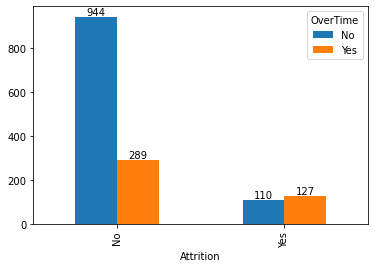

In [69]:
ax = over_raw.plot(kind = 'bar')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.show()

In [70]:
chi,p,dof,exp = stats.chi2_contingency(over_raw)
print('the chi square test is {}'.format(p))
# p < 0.05
# OverTime is significantly affect the attrition rate

the chi square test is 8.15842372153832e-21


<!-- ### Describe the Attrition based on Marital Status. Compute the attrition rate based on Marital Status -->

In [71]:
# marry_raw = round(pd.crosstab(index=medical_df['Attrition'],columns=medical_df['MaritalStatus']),2)
# marry_raw

In [72]:
# chi,p,dof,exp = stats.chi2_contingency(marry_raw)
# p

In [73]:
# rearranging the columns
medical_df.columns

Index(['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
       'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition'],
      dtype='object')

In [74]:
# medical_df = medical_df[['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
#         'DistanceFromHome','EnvSatisfaction', 'YearsAtCompany',
#        'YearsSinceLastPromotion', 'OverTime', 'Attrition']]

#logistic - overall 0.86  No       0.86  Yes       0.78 
# naive - overall 0.82  No       0.87  Yes       0.41 

# medical_df = medical_df[['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
#        'Department', 'DistanceFromHome',
#        'EnvSatisfaction', 'JobRole',
#        'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
#        'YearsSinceLastPromotion', 'OverTime', 'Attrition']] 
#logistic -  overall 0.86  No       0.86  Yes       0.86 
#naive - overall 0.7 No       0.91 Yes       0.29

# medical_df = medical_df[['Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'DistanceFromHome',
#        'EnvSatisfaction','YearsSinceLastPromotion', 'OverTime', 'Attrition']] 

#logistic -  overall 0.85   No 0.85         Yes   0.83     
#naive - overall 0.84  No 0.86       Yes  0.47

# medical_df = medical_df[['Age', 'MonthlyIncome',
#        'EnvSatisfaction','YearsSinceLastPromotion', 'OverTime', 'Attrition']] 

#logistic -  overall 0.85    No  0.85        Yes 0.75       
#naive - overall 0.85   No 0.86       Yes  0.57


# medical_df = medical_df[['JobSatisfaction', 'DistanceFromHome','MaritalStatus', 'OverTime', 'BusinessTravel',
#                          'PerformanceRating', 'TrainingTimesLastYear','Attrition']] 

#logistic -  overall 0.84    No 0.85         Yes  0.57      
#naive - overall 0.80    No 0.85       Yes 0.23 

# 'Age', 'BusinessTravel', 'MonthlyIncome', 'JobSatisfaction', 'Bonus',
#        'DistanceFromHome', 'EnvSatisfaction', 'Gender', 'MaritalStatus',
#        'PerformanceRating', 'TrainingTimesLastYear', 'YearsAtCompany',
#        'YearsSinceLastPromotion', 'OverTime', 'Attrition'
    
# medical_df = medical_df[['JobSatisfaction','Age','OverTime', 'YearsAtCompany',
#                          'EnvSatisfaction','TrainingTimesLastYear','Attrition']] 

#logistic -  overall 0.85    No 0.85         Yes  0.62  f1-score no 0.91 yes 0.19  
#naive - overall 0.85     No 0.85      Yes 0.62 f1-score no 0.92 yes 0.23

# medical_df = medical_df[['BusinessTravel', 'JobSatisfaction',
#        'DistanceFromHome', 'EnvSatisfaction', 'Gender', 'MaritalStatus',
#        'TrainingTimesLastYear', 'YearsAtCompany',
#        'YearsSinceLastPromotion', 'OverTime', 'Attrition']]

#logistic -  overall 0.85    No 0.86        Yes  0.67  f1-score no 0.92 yes 0.30  
#naive - overall 0.80     No 0.86      Yes 0.33 f1-score no 0.88 yes 0.27

medical_df = medical_df[['Age','BusinessTravel', 'JobSatisfaction',
       'DistanceFromHome', 'EnvSatisfaction', 'Gender', 'MaritalStatus',
       'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'OverTime', 'Attrition']]

#logistic -  overall 0.87    No 0.87        Yes  0.78 f1-score no 0.9 yes 0.38  
#naive - overall 0.82      No 0.87      Yes 0.40  f1-score no 0.9  yes 0.32

# medical_df = medical_df[['MonthlyIncome','BusinessTravel', 'JobSatisfaction',
#        'DistanceFromHome', 'EnvSatisfaction', 'Gender', 'MaritalStatus',
#        'TrainingTimesLastYear', 'YearsAtCompany',
#        'YearsSinceLastPromotion', 'OverTime', 'Attrition']]

#logistic -  overall 0.86    No 0.87        Yes  0.75 f1-score no 0.92 yes 0.33  
#naive - overall 0.81       No 0.87       Yes 0.39    f1-score no 0.89   yes 0.33 

# medical_df = medical_df[['BusinessTravel', 'JobSatisfaction',
#        'DistanceFromHome', 'EnvSatisfaction', 'Gender', 'MaritalStatus',
#        'TrainingTimesLastYear', 'YearsAtCompany',
#        'YearsSinceLastPromotion', 'OverTime', 'Attrition']]


# medical_df = medical_df[['Age', 'BusinessTravel', 'JobSatisfaction',
#        'Department', 'DistanceFromHome', 'Education', 'EducationField',
#        'EnvSatisfaction', 'Gender', 'JobRole', 'MaritalStatus',
#        'TrainingTimesLastYear', 'YearsAtCompany',
#        'YearsSinceLastPromotion', 'OverTime', 'Attrition']]

medical_df


Age     BusinessTravel  JobSatisfaction  DistanceFromHome  \
EmployeeID                                                              
1            41      Travel_Rarely                4                 1   
2            49  Travel_Frequently                2                 8   
4            37      Travel_Rarely                3                 2   
5            33  Travel_Frequently                3                 3   
7            27      Travel_Rarely                2                 2   
...         ...                ...              ...               ...   
2061         36  Travel_Frequently                4                23   
2062         39      Travel_Rarely                1                 6   
2064         27      Travel_Rarely                2                 4   
2065         49  Travel_Frequently                2                 2   
2068         34      Travel_Rarely                3                 8   

            EnvSatisfaction  Gender MaritalStatus  TrainingTimesLastYear  \
EmployeeID                                                                 
1                         2  Female        Single                      0   
2                         3    Male       Married                      3   
4                         4    Male        Single                      3   
5                         4  Female       Married                      3   
7                         1    Male       Married                      3   
...                     ...     ...           ...                    ...   
2061                      3    Male       Married                      3   
2062                      4    Male       Married                      5   
2064                      2    Male       Married                      0   
2065                      4    Male       Married                      3   
2068                      2    Male       Married                      3   

            YearsAtCompany  YearsSinceLastPromotion OverTime Attrition  
EmployeeID                                                              
1                        6                        0      Yes       Yes  
2                       10                        1       No        No  
4                        0                        0      Yes       Yes  
5                        8                        3      Yes        No  
7                        2                        2       No        No  
...                    ...                      ...      ...       ...  
2061                     5                        0       No        No  
2062                     7                        1       No        No  
2064                     6                        0      Yes        No  
2065                     9                        0       No        No  
2068                     4                        1       No        No  

[1470 rows x 12 columns]

### Assigning X and y variable 

In [75]:
# Assign X and y values for the partitioning
X = medical_df.iloc[:,:-1]
y = medical_df.iloc[:,-1]

In [76]:
X

Age     BusinessTravel  JobSatisfaction  DistanceFromHome  \
EmployeeID                                                              
1            41      Travel_Rarely                4                 1   
2            49  Travel_Frequently                2                 8   
4            37      Travel_Rarely                3                 2   
5            33  Travel_Frequently                3                 3   
7            27      Travel_Rarely                2                 2   
...         ...                ...              ...               ...   
2061         36  Travel_Frequently                4                23   
2062         39      Travel_Rarely                1                 6   
2064         27      Travel_Rarely                2                 4   
2065         49  Travel_Frequently                2                 2   
2068         34      Travel_Rarely                3                 8   

            EnvSatisfaction  Gender MaritalStatus  TrainingTimesLastYear  \
EmployeeID                                                                 
1                         2  Female        Single                      0   
2                         3    Male       Married                      3   
4                         4    Male        Single                      3   
5                         4  Female       Married                      3   
7                         1    Male       Married                      3   
...                     ...     ...           ...                    ...   
2061                      3    Male       Married                      3   
2062                      4    Male       Married                      5   
2064                      2    Male       Married                      0   
2065                      4    Male       Married                      3   
2068                      2    Male       Married                      3   

            YearsAtCompany  YearsSinceLastPromotion OverTime  
EmployeeID                                                    
1                        6                        0      Yes  
2                       10                        1       No  
4                        0                        0      Yes  
5                        8                        3      Yes  
7                        2                        2       No  
...                    ...                      ...      ...  
2061                     5                        0       No  
2062                     7                        1       No  
2064                     6                        0      Yes  
2065                     9                        0       No  
2068                     4                        1       No  

[1470 rows x 11 columns]

In [77]:
y

EmployeeID
1       Yes
2        No
4       Yes
5        No
7        No
       ... 
2061     No
2062     No
2064     No
2065     No
2068     No
Name: Attrition, Length: 1470, dtype: object

### Handling Categorical Data

In [78]:
# Only transform the input variable
X = pd.get_dummies(X,drop_first=True)
X.head(5)

Age  JobSatisfaction  DistanceFromHome  EnvSatisfaction  \
EmployeeID                                                            
1            41                4                 1                2   
2            49                2                 8                3   
4            37                3                 2                4   
5            33                3                 3                4   
7            27                2                 2                1   

            TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
EmployeeID                                                                   
1                               0               6                        0   
2                               3              10                        1   
4                               3               0                        0   
5                               3               8                        3   
7                               3               2                        2   

            BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
EmployeeID                                                                   
1                                          0                             1   
2                                          1                             0   
4                                          0                             1   
5                                          1                             0   
7                                          0                             1   

            Gender_Male  MaritalStatus_Married  MaritalStatus_Single  \
EmployeeID                                                             
1                     0                      0                     1   
2                     1                      1                     0   
4                     1                      0                     1   
5                     0                      1                     0   
7                     1                      1                     0   

            OverTime_Yes  
EmployeeID                
1                      1  
2                      0  
4                      1  
5                      1  
7                      0

#### Partitioning

In [79]:
# Partitioning the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                   random_state=0, stratify = y) # using test size 0.3

In [80]:
X_train

Age  JobSatisfaction  DistanceFromHome  EnvSatisfaction  \
EmployeeID                                                            
1523         44                1                28                4   
1212         40                2                 2                2   
110          34                2                 1                1   
615          40                1                28                3   
1161         37                4                25                3   
...         ...              ...               ...              ...   
1061         50                3                 2                2   
527          25                4                 4                2   
602          39                3                 8                3   
807          40                2                 2                3   
689          37                3                 3                3   

            TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
EmployeeID                                                                   
1523                            1              20                       14   
1212                            2               0                        0   
110                             2               5                        1   
615                             2               1                        0   
1161                            2               6                        1   
...                           ...             ...                      ...   
1061                            2               8                        7   
527                             3               5                        1   
602                             3               8                        0   
807                             2               8                        3   
689                             2              10                        7   

            BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
EmployeeID                                                                   
1523                                       0                             1   
1212                                       1                             0   
110                                        0                             1   
615                                        0                             0   
1161                                       0                             1   
...                                      ...                           ...   
1061                                       0                             1   
527                                        0                             1   
602                                        1                             0   
807                                        1                             0   
689                                        0                             1   

            Gender_Male  MaritalStatus_Married  MaritalStatus_Single  \
EmployeeID                                                             
1523                  1                      1                     0   
1212                  1                      1                     0   
110                   1                      1                     0   
615                   1                      0                     0   
1161                  0                      0                     0   
...                 ...                    ...                   ...   
1061                  1                      1                     0   
527                   0                      0                     1   
602                   0                      1                     0   
807                   0                      1                     0   
689                   1                      1                     0   

            OverTime_Yes  
EmployeeID                
1523                   0  
1212                   0  
110          

In [81]:
print(len(X_train),len(X_test))

1029 441


In [82]:
X_train

Age  JobSatisfaction  DistanceFromHome  EnvSatisfaction  \
EmployeeID                                                            
1523         44                1                28                4   
1212         40                2                 2                2   
110          34                2                 1                1   
615          40                1                28                3   
1161         37                4                25                3   
...         ...              ...               ...              ...   
1061         50                3                 2                2   
527          25                4                 4                2   
602          39                3                 8                3   
807          40                2                 2                3   
689          37                3                 3                3   

            TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
EmployeeID                                                                   
1523                            1              20                       14   
1212                            2               0                        0   
110                             2               5                        1   
615                             2               1                        0   
1161                            2               6                        1   
...                           ...             ...                      ...   
1061                            2               8                        7   
527                             3               5                        1   
602                             3               8                        0   
807                             2               8                        3   
689                             2              10                        7   

            BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
EmployeeID                                                                   
1523                                       0                             1   
1212                                       1                             0   
110                                        0                             1   
615                                        0                             0   
1161                                       0                             1   
...                                      ...                           ...   
1061                                       0                             1   
527                                        0                             1   
602                                        1                             0   
807                                        1                             0   
689                                        0                             1   

            Gender_Male  MaritalStatus_Married  MaritalStatus_Single  \
EmployeeID                                                             
1523                  1                      1                     0   
1212                  1                      1                     0   
110                   1                      1                     0   
615                   1                      0                     0   
1161                  0                      0                     0   
...                 ...                    ...                   ...   
1061                  1                      1                     0   
527                   0                      0                     1   
602                   0                      1                     0   
807                   0                      1                     0   
689                   1                      1                     0   

            OverTime_Yes  
EmployeeID                
1523                   0  
1212                   0  
110          

In [83]:
y_train

EmployeeID
1523    No
1212    No
110     No
615     No
1161    No
        ..
1061    No
527     No
602     No
807     No
689     No
Name: Attrition, Length: 1029, dtype: object

#### Scaling the Data or perform Normalization

In [84]:
#Scaling the data
from sklearn.preprocessing import StandardScaler # Zscore normalization

scaler = StandardScaler()
scaler.fit(X_train) # compute the scalar model
X_train = scaler.transform(X_train) # here it will transform the X train into standard data

In [85]:
X_train

array([[ 0.75909679, -1.54871647,  2.3244173 , ...,  1.09485978,
        -0.68097495, -0.63245553],
       [ 0.32796082, -0.64118273, -0.88376782, ...,  1.09485978,
        -0.68097495, -0.63245553],
       [-0.31874314, -0.64118273, -1.00715956, ...,  1.09485978,
        -0.68097495, -0.63245553],
       ...,
       [ 0.22017682,  0.26635101, -0.14341741, ...,  1.09485978,
        -0.68097495, -0.63245553],
       [ 0.32796082, -0.64118273, -0.88376782, ...,  1.09485978,
        -0.68097495, -0.63245553],
       [ 0.00460884,  0.26635101, -0.76037609, ...,  1.09485978,
        -0.68097495, -0.63245553]])

In [86]:
# x_train_copy = pd.DataFrame(X_train)
# x_train_copy

#### Train the Model using Logistic Regression

In [87]:
#Train Logistic Regression Algorithm

#Import LogisticRegression() function
from sklearn.linear_model import LogisticRegression

#Create a Logistic Regression classifier
# random state is 0 because to maintain the data generated value
medical_model = LogisticRegression(random_state=0) 

#Train the Logistic Regression algorithm using train set
medical_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

#### Train the Model using Naive Beyes Thereom

In [88]:
# # #Train Naive Beyes Thereom Algorithm
# from sklearn.naive_bayes import GaussianNB

# medical_model = GaussianNB()

# medical_model.fit(X_train,y_train)

#### Apply the model to test set

In [89]:
# Apply the model with the test set
#Feature Scaling the Test Set
from sklearn.preprocessing import StandardScaler
X_test = scaler.transform(X_test)
X_test

array([[-0.9654471 ,  1.17388475, -0.51359262, ..., -0.91335896,
         1.46848279, -0.63245553],
       [ 0.5435288 , -1.54871647,  0.10336606, ...,  1.09485978,
        -0.68097495, -0.63245553],
       [ 2.48364067,  1.17388475, -0.26680915, ..., -0.91335896,
        -0.68097495,  1.58113883],
       ...,
       [-1.39658307,  0.26635101,  0.10336606, ..., -0.91335896,
        -0.68097495,  1.58113883],
       [ 0.5435288 ,  1.17388475,  1.70745862, ..., -0.91335896,
         1.46848279, -0.63245553],
       [-0.8576631 , -1.54871647, -1.00715956, ...,  1.09485978,
        -0.68097495, -0.63245553]])

In [90]:
# Apply for Test Set
y_pred=medical_model.predict(X_test)
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No

In [91]:
#Dataframe of Predicted Output and Actual Output for Test set
df_validate = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_validate['Predicted']=df_validate['Predicted']
df_validate.head(5)

Actual Predicted
EmployeeID                 
916            No        No
1408           No        No
1233           No        No
1640           No        No
1133           No        No

#### Performance Evaluation

In [92]:
# use crosstab to evaluate the categorical
pd.crosstab(y_pred,y_test)

Attrition   No  Yes
row_0              
No         365   53
Yes          5   18

#### Precision & Sensitivity/Recall Report
- Logistic Regression
    - using Age
        -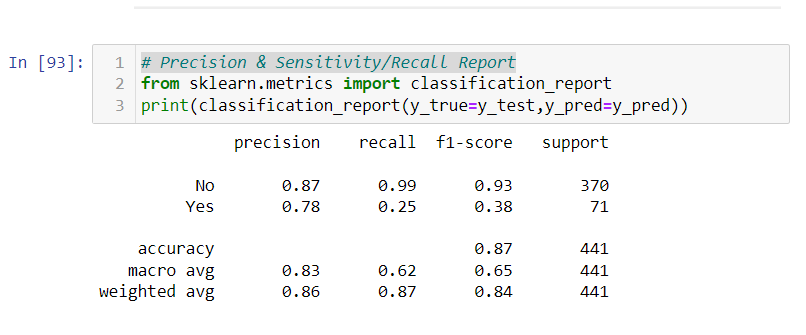
    - using Monthly Income
        -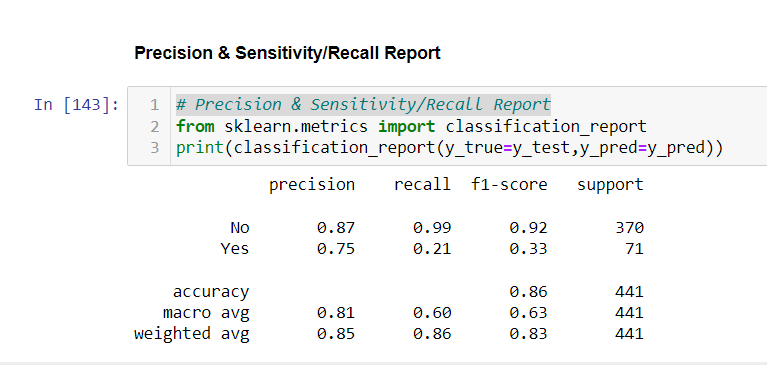
    - using Non Monthly Income and Age
        -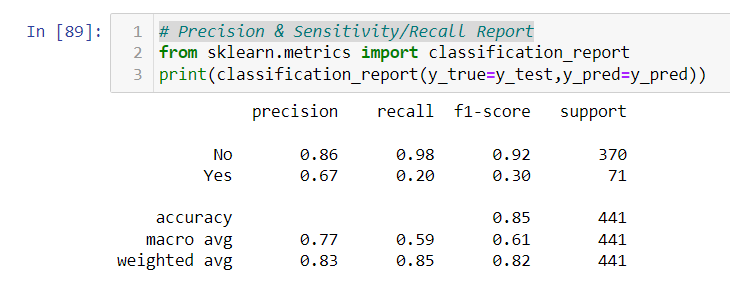
- Naive Beyes
    - using Age
        -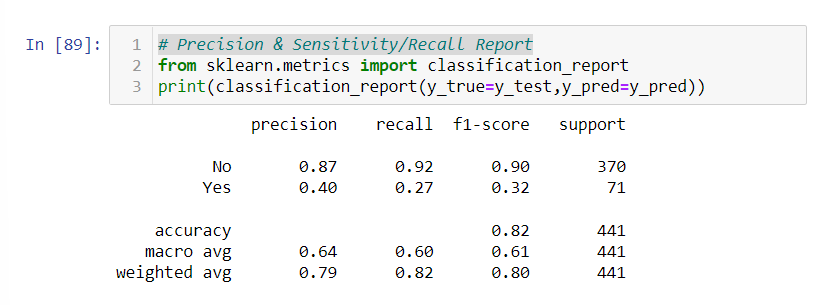

In [93]:
# Precision & Sensitivity/Recall Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       370
         Yes       0.78      0.25      0.38        71

    accuracy                           0.87       441
   macro avg       0.83      0.62      0.65       441
weighted avg       0.86      0.87      0.84       441

